In [ ]:
# Version 1.01
# Authors: 1) Hamza Nadeem
#          2) Monica Restrepo
#          3) Nency Borad
#          4) Ajinkya Mukherjee
# Date      Name  Version Description
# 5/6/2022  SCL   1.01    Refactor code for Hypothesis (part II), and remove all
#                         EDA code.
#                 1.01    Perform Feature Selection and create utility matrix
#                         labelled data, for supervised machine learning
#
# -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -

In [ ]:
# Features: 1) PopSize 
#           2) Time
#           3) Date
#           4) Num of complaints
#           5) Type of Crime [Felony, Misdorminor, Violation]
#           -) Class = [ Low Crime, Medium Crime, High Crime ]
#               10 = Low
#              200 = Medium
#             9000 = High

# Hypo: FIgure out which zip codes will increase/dec in crime rate? 
#and we need to categorize the dataset into LOW MID HIGH  
# Algorithms: 1) SVM
#             2) Bayes (NB)
#             3) Random Forest
#             4) Logistic Regression (0 or 1)
# -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -

In [ ]:
# Questions to ask Professor
# Q1: We did all this, how do add them to our Feature list
# Q2: How do we Classify what is high,low,medium ( How do we get the score) = Range of the score
# Q3: How do we get Population by Zipcode from total population of Burrow
# Q4: Can we use the Number of Crimes in Each Zipcode as our Feature for number of complaints / per area
# Q5: How do we add Labels to our dataset inorder to Train them - adding Labels to the Testing set
# Q6: How does the iris dataset have so many features & Classes, how do we optimize our features accordingly 
#     and why do we require so many featueres and Classes?
# Q7: Are we implementing the Alogirthms correct

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive');

Mounted at /content/gdrive


In [ ]:
pip install scikit-learn-intelex

In [ ]:
# from sklearnex import patch_sklearn 

# patch_sklearn()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df1 = pd.read_csv('/content/gdrive/MyDrive/AI/final_project_csvs/NYPD_Complaint_Data_Historic.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/AI/final_project_csvs/Crime_Column_Description.csv')
df3 = pd.read_csv('/content/gdrive/MyDrive/AI/final_project_csvs/Population_by_Borough_NYC.csv')
#df4 = pd.read_csv('/content/gdrive/MyDrive/AI/final_project_csvs/ziptoborough.csv')
# newData = pd.read_csv('US.csv')
# zip_codes = pd.read_csv('/content/gdrive/MyDrive/AI/final_project_csvs/us.csv')

# zip_codes


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:

df5 = pd.DataFrame(df1[['Longitude','Latitude']])
# df1['Latitude']
df5

,Longitude,Latitude
0,-73.916661,40.828848
1,-73.784557,40.697338
2,-73.945052,40.802607
3,-73.726339,40.654549
4,-73.987891,40.738002
...,...,...
1048570,-73.920767,40.806932
1048571,-73.895227,40.660901
1048572,-74.004681,40.723909
1048573,-73.872939,40.877554


In [ ]:
# 54.143 - Lat
# -165.7854 - Long
# zc = zip_codes.head(10)
# zc


#helper

# def findZip(lat, long):
  # print('lat', "%.4f" % lat)

  # lat = "%.4f" % lat
  # long = "%.4f" % long
  # print('lat', lat)
  # print('long', long)
  # t = np.where((zip_codes['Latitude'] == lat) & (zip_codes['Longitude'] == long), zip_codes['ZIP'], 99999)
  # print('here====>', t)
  # if zip_codes['Latitude'] == lat:
  #   if zip_codes['Longitude'] == long:
  #     print('We got it!!', zip_codes['Zip'])

# s= df5.head(20)
# df5['Longitude'] = df5['Longitude'].astype(float)
# df5['Latitude'] = df5['Latitude'].astype(float)
# df5['Longitude'] = "%.6f" % df5['Longitude']
# df5['Latitude'] = "%.6f" % df5['Latitude']

# df5 = np.where(df1['Latitude'] == zc['Latitude'] and df1['Longitude'] == zc['Longitude'],zc['zip'],99999)
# # t
# for i, value in s.iterrows():
#   # print('idx', i)
#   # print('value ====> ', value)
#   findZip(value['Latitude'], value['Longitude'])
    # print('lat only :::::>', value['Latitude'])


# df5['Zipcode'] = np.where(df1['Latitude'] == zip_codes['Latitude'] and df1['Longitude'] == zip_codes['Longitude'],zip_codes['zip'],99999)

# newData['LONG']
# zipcode_Dict = newData.set_index('ZIP').T.to_dict('list')

In [ ]:
# zipcode_Dict

In [ ]:
def makeCategories(df):
  category = [health,residence,worship,pub,retail,Tranportation,Food_Beverage,finance,other]
  residence_count = 0
  health_count = 0
  worship_count = 0
  pub_count = 0
  retial_count = 0
  tranport_count = 0
  foodbev_count = 0
  finance_count = 0
  other_count = 0
  df['Food & beverage'] = 0

  for a in df['PREM_TYP_DESC']:
    if a in residence:      
      residence_count += 1
      
    if a in other:
      other_count += 1

    if a in finance:
      finance_count += 1

    if a in Food_Beverage:
      foodbev_count += 1
      df['Food and beverage'] = 1
      pass

    if a in Tranportation:
      tranport_count += 1

    if a in retail:
      retial_count += 1

    if a in worship:
      worship_count += 1
        
    if a in health:
      health_count += 1
      
  print('residence',residence_count)
  print('other',other_count)
  print('finance',finance_count)
  print('food',foodbev_count)        
  print('Transport',tranport_count)
  print('Retail',retial_count)
  print('Worship',worship_count)
  print('Health',health_count)

  return residence_count, other_count, finance_count, foodbev_count, tranport_count, retial_count, worship_count, health_count, pub_count

In [ ]:
df1 = df1.sample(1000)

In [ ]:
health = ['DRUG STORE','DOCTOR/DENTIST OFFICE','HOSPITAL']
residence = ['RESIDENCE-HOUSE','RESIDENCE - APT. HOUSE','RESIDENCE - PUBLIC HOUSING']
worship = ['CHURCH','SYNAGOGUE','OTHER HOUSE OF WORSHIP','MOSQUE']
pub = ['STREET','PUBLIC BUILDING','PARK/PLAYGROUND','PARKING LOT/GARAGE (PUBLIC)','PRIVATE/PAROCHIAL SCHOOL','BOOK/CARD','MARINA/PIER',
       'PUBLIC SCHOOL','CEMETERY']
retail = ['DRY CLEANER/LAUNDRY','GAS STATION','CHAIN STORE','BEAUTY & NAIL SALON',
          'COMMERCIAL BUILDING','HOTEL/MOTEL','SMALL MERCHANT','PARKING LOT/GARAGE (PRIVATE)',
          'DEPARTMENT STORE','GYM/FITNESS FACILITY','VARIETY STORE','CLOTHING/BOUTIQUE','TELECOMM. STORE',
          'JEWELRY','CANDY STORE','STORAGE FACILITY','VIDEO STORE']
Tranportation = ['TUNNEL','TRANSIT - NYC SUBWAY','BUS (NYC TRANSIT)','FERRY/FERRY TERMINAL','BUS STOP','TAXI (LIVERY LICENSED)',
                 'BRIDGE','AIRPORT TERMINAL','HIGHWAY/PARKWAY','BUS (OTHER)',
                 'TRANSIT FACILITY (OTHER)','BUS TERMINAL','TAXI (YELLOW LICENSED)','TAXI/LIVERY (UNLICENSED)','TRAMWAY']
Food_Beverage= ['BAR/NIGHT CLUB' , 'FAST FOOD' , 'RESTAURANT/DINER' , 'GROCERY/BODEGA' , 'FOOD SUPERMARKET' , 'SOCIAL CLUB/POLICY' , 'LIQUOR STORE']
finance = ['CHECK CASHING BUSINESS','BANK','ATM','LOAN COMPANY']
other = ['OTHER','STORE UNCLASSIFIED','CONSTRUCTION SITE','FACTORY/WAREHOUSE','OPEN AREAS (OPEN LOTS)','ABANDONED BUILDING','SHOE','PHOTO/COPY']

In [ ]:
df1.head(4)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
760094,742171909,6/6/2014,11:00:00,6/6/2014,11:20:00,6/9/2014,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,VIOLATION OF ORDER OF PROTECTI,...,103.0,FRONT OF,PUBLIC BUILDING,NaN,NaN,1038771.0,195254.0,40.702444,-73.803367,"(40.702444153, -73.803366663)"
77828,438040109,10/31/2015,11:00:00,10/31/2015,11:05:00,11/1/2015,106,FELONY ASSAULT,105.0,STRANGULATION 1ST,...,103.0,INSIDE,STREET,NaN,NaN,1041453.0,197361.0,40.708210,-73.793676,"(40.708210426, -73.79367593)"
387653,142492677,3/20/2015,22:30:00,3/20/2015,22:35:00,3/21/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,33.0,NaN,STREET,NaN,NaN,1002974.0,247561.0,40.846161,-73.932326,"(40.846161249, -73.932325855)"
978580,227346990,12/24/2013,11:45:00,12/24/2013,12:20:00,12/24/2013,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,79.0,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,MARCY,997366.0,192877.0,40.696078,-73.952702,"(40.696078078, -73.952701992)"


In [ ]:
#residencecount, othercount, financecount, foodbevcount, tranportcount, retialcount, worshipcount, healthcount, pubcount = makeCategories(df1)

In [ ]:
# #Assign zipcodes to each row

# import geopy
# from geopy.point import Point

# def get_zipcode(df5, geolocator, Latitude, Longitude):
#   zipcode = 99999
#   try: 
#     # location = geolocator.reverse(Point(df1["Latitude"], df1["Longitude"]))
#     location = geolocator.reverse(Point(df5["Latitude"], df5["Longitude"]))
#     zipcode = location.raw['address']['postcode']
#     zipcode = int(zipcode)
#   except:
#     pass
#   return zipcode

# geolocator = geopy.Nominatim(user_agent='AI-application')
# df1['Zipcodes'] = df1.apply(get_zipcode, axis=1, geolocator=geolocator, Latitude=df1["Latitude"], Longitude=df1["Longitude"])


In [ ]:
# from multiprocessing import Process
# p1 = Process(target=get_zipcode, args=(df5,))
# df1.head()

HYPOTHESIS: Segregate Burrows based on type of crime. 

In [ ]:
# Pop Size
feature_1 = df3[['Borough','2010','2020']]
feature_1 = feature_1.apply(lambda x: x.str.upper() if x.dtype == "object" else x)  
feature_1.rename(columns = {'Borough':'BORO_NM'}, inplace = True)
feature_1


,BORO_NM,2010,2020
0,NYC TOTAL,"8,242,624","8,550,971"
1,BRONX,"1,385,108","1,446,788"
2,BROOKLYN,"2,552,911","2,648,452"
3,MANHATTAN,"1,585,873","1,638,281"
4,QUEENS,"2,250,002","2,330,295"
5,STATEN ISLAND,"468,730","487,155"


In [ ]:
# #df1 = df1.dropna()
# #df1.head(100)
# null_columns=df1.columns[df1.isnull().any()]
# df1[null_columns].isnull().sum()
# df1.drop(329156, inplace=True)
# print(df1[df1['ADDR_PCT_CD'].isnull()][null_columns].head())

In [ ]:
df1['ADDR_PCT_CD'].unique()
# df1['ADDR_PCT_CD']

array([103.,  33.,  79.,  76.,  43.,  68.,  60.,  10.,  70., 120., 114.,
        25., 121.,   9.,  73.,  94.,  14.,  81.,  47., 105., 122., 113.,
         5.,  23., 108.,  77., 100.,  28.,  48.,  75., 111.,  44., 109.,
        45.,  13., 107.,  49.,  62.,  18.,  61.,  63.,  46.,   7.,   6.,
        34., 110.,  88.,  19.,  69.,  84.,  72.,  17.,  67., 115.,  40.,
       102.,  66.,  41.,  71.,  78.,  83.,  52.,  30.,   1., 112.,  90.,
       123.,  42.,  32., 101., 104.,  50., 106.,  22.,  20.,  24.,  26.])

In [ ]:
# Time of Day
feature_set = df1[['CMPLNT_FR_TM','BORO_NM','ADDR_PCT_CD']]
feature_set['Precinct Num'] = df1['ADDR_PCT_CD']
feature_set.set_index('ADDR_PCT_CD', inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
bronx_ = 1385108
brook_ = 2552911
manha_ = 1585873
queen_ = 2250002
state_ = 468730

In [ ]:
feature_set['Count'] = df1.groupby(by='ADDR_PCT_CD')['CMPLNT_NUM'].count()
feature_set['Pop'] = 0
feature_set.loc[feature_set["BORO_NM"] == "MANHATTAN", "Pop"] = manha_
feature_set.loc[feature_set["BORO_NM"] == "BRONX", "Pop"] = bronx_
feature_set.loc[feature_set["BORO_NM"] == "QUEENS", "Pop"] = queen_
feature_set.loc[feature_set["BORO_NM"] == "STATEN ISLAND", "Pop"] = state_
feature_set.loc[feature_set["BORO_NM"] == "BROOKLYN", "Pop"] = brook_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
print("minimum crime count => ", feature_set['Count'].min())
print("max crime count => ", feature_set['Count'].max())
print("mean crime count => ", feature_set['Count'].mean())

minimum crime count =>  1
max crime count =>  36
mean crime count =>  15.978


In [ ]:
# Add Class Low Medium, High
# if time between 6pm and 4am, and count > 10, then high_crime
# if time between 6pm and 4am, and count < 10 but > 5, then medium_crime
# if time between 6pm and 4am, and count < 5, then low_crime
#
#feature_set['Class'] = 0

# Change Count everytime you change Sample Size
# feature_set.loc[feature_set["Count"] >= 26217, "Class"]          = 'high'
# feature_set.loc[feature_set["Count"] <= 7570, "Class"]           = 'low'
# feature_set.loc[feature_set["Count"].between(7571,26216), "Class"] = 'med'

feature_set.loc[feature_set["Count"] >= 30 , "Class"]          = 'high'
feature_set.loc[feature_set["Count"] <= 12, "Class"]           = 'low'
feature_set.loc[feature_set["Count"].between(13,29), "Class"] = 'medium'


# Split time into hh mm ss
feature_set[['hour', 'minutes', 'seconds']] = feature_set['CMPLNT_FR_TM'].str.split(':', expand=True)
feature_set.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,CMPLNT_FR_TM,BORO_NM,Precinct Num,Count,Pop,Class,hour,minutes,seconds
ADDR_PCT_CD,,,,,,,,,
103.0,11:00:00,QUEENS,103.0,22,2250002,medium,11,00,00
103.0,11:00:00,QUEENS,103.0,22,2250002,medium,11,00,00
33.0,22:30:00,MANHATTAN,33.0,13,1585873,medium,22,30,00
79.0,11:45:00,BROOKLYN,79.0,18,2552911,medium,11,45,00
76.0,16:43:00,BROOKLYN,76.0,5,2552911,low,16,43,00


In [ ]:
# Drop the Boro Name for now
#feature_set.drop(['BORO_NM'], axis=1, inplace=True)

# Can we add tags to each data based on location of crime ( Health, residence, Retail)

In [ ]:
# Creating the Main Function/ Calling these Algorithms
X = feature_set[['Pop','hour','Count',]]
y = feature_set[['Class']]

In [ ]:
#-------------------------------------------------------#
# Start Part 2 of the Prject using Keras/scikitlearn

# sklearn imports below
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Function to Create 
def mlSVM(X,y,p): # Ajinkya
  svm_prediction = -1
  #svcObj = LinearSVC()
  svcObj = SVC()
  clf = svcObj.fit(X,y)
  svm_prediction = svcObj.predict(p)
  return svm_prediction

def mlRegression(X, y, p): # Nency
  # init y_predict
  linear_prediction = -1
  
  regObj = LogisticRegression()
  regObj.fit(X, y)
  logistic_prediction = regObj.predict(p)
  logistic_prediction_score = regObj.score(X,y)

  return logistic_prediction,logistic_prediction_score

def mlRandomForest(X, y, p): # Hamza
  # init y_predict
  rf_prediction = -1

  rfObj = RandomForestClassifier()
  rfObj.fit(X, y)
  rf_prediction = rfObj.predict(p)

  return rf_prediction

def mlBayes(X, y, p): # Monica
  # init y_predict
  bayes_prediction = -1

  bayesObj = GaussianNB()   # create an instance of the object
  bayesObj.fit(X,y)        # fit or train the model
  bayes_prediction = bayesObj.predict(p)

  return bayes_prediction

  


In [ ]:
feature_set

,CMPLNT_FR_TM,BORO_NM,Precinct Num,Count,Pop,Class,hour,minutes,seconds
ADDR_PCT_CD,,,,,,,,,
103.0,11:00:00,QUEENS,103.0,22,2250002,medium,11,00,00
103.0,11:00:00,QUEENS,103.0,22,2250002,medium,11,00,00
33.0,22:30:00,MANHATTAN,33.0,13,1585873,medium,22,30,00
79.0,11:45:00,BROOKLYN,79.0,18,2552911,medium,11,45,00
76.0,16:43:00,BROOKLYN,76.0,5,2552911,low,16,43,00
...,...,...,...,...,...,...,...,...,...
49.0,6:35:00,BRONX,49.0,18,1385108,medium,6,35,00
120.0,8:00:00,STATEN ISLAND,120.0,20,468730,medium,8,00,00
63.0,16:00:00,BROOKLYN,63.0,14,2552911,medium,16,00,00


In [ ]:
feature_set.isnull().sum()

CMPLNT_FR_TM    0
BORO_NM         0
Precinct Num    0
Count           0
Pop             0
Class           0
hour            0
minutes         0
seconds         0
dtype: int64

In [ ]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 50, )
X_train= X_train.astype(int)
X_test = X_test.astype(int)



# y_train = y_train.astype(int)
# y_test = y_test.astype(int)



y_reg,score_regression = mlRegression(X_train, y_train, X_test)
score_regression = accuracy_score(y_test,y_reg)

y_rf  = mlRandomForest(X_train, y_train, X_test)
score_randomForest = accuracy_score(y_test,y_rf)

y_bayes = mlBayes(X_train, y_train, X_test)
score_bayes = accuracy_score(y_test,y_bayes)





print('The accuracy score is bayes = ', score_bayes)
print('The accuracy score is reg   = ', score_regression)
print('The accuracy score is rfores= ', score_randomForest)




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The accuracy score is bayes =  0.48
The accuracy score is reg   =  0.62
The accuracy score is rfores=  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Plot predicted values  <br> y= test x= Zipcode <br> Heat Map If Possible otherwise any chart that can help us visualize the predicted values<br>

In [ ]:
y_svm = mlSVM(X_train, y_train, X_test)
score_SVM= accuracy_score(y_test,y_svm)
print('The accuracy score is svm   = ', score_SVM)

The accuracy score is svm   =  0.62


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Crime Count per precinct
# min = 832
# mean = 15973
# max = 36460

# How did we calculate our Class range for low med high 
# crime rate
# First Trial
# For Crime Rate Class Low: (mean - min)/2 : (15973 - 832)/2 = 7570
# For Crime Rate Class High: (max - mean): 36460 - 15973 : 26217
# For Crime Rate Class Med: everything in between  7571 - 26216
# Accuracy Score:
#                 bayes:0.9991512290489474
#                 svm:
#                 reg: 0.9254750494719023
#                 rfores: 1.0 

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid= {
#     'high': 3,
#     'med':2,
#     'low':1, 
# }
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=42))
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [ ]:
# from sklearn.metrics import PrecisionRecallDisplay

# #classifier = feature_set['Class']
# display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="LinearSVC")
# _ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_bayes)
cnf_matrix

array([[ 9,  0,  0],
       [16,  0, 51],
       [37,  0, 87]])

Text(0.5, 257.44, 'Predicted label')

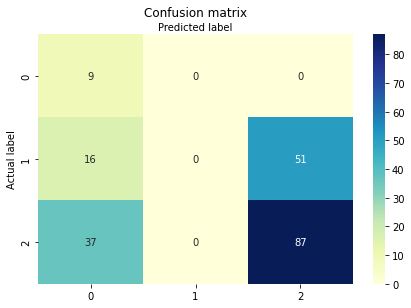

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
bayes = 99.93
lR =92.35
rF = 100
Svm = 100
